# CS60050_Machine Learning_Programming Assignment_3
> ### Part A: Support Vector Machines (SVMs) and Kernel Methods - HIGGS Dataset

#### **Chandransh Singh (22CS30017)**

## 1. Data Preprocessing and Exploration

Gathering all the necessary libraries

- **kagglehub**: Used for interacting with Kaggle datasets and competitions.
- **os**: Provides functions for interacting with the operating system, such as file and directory manipulation.
- **shutil**: Offers high-level operations on files and collections of files, such as copying and removing files.
- **pandas**: A powerful data manipulation and analysis library, used for handling and analyzing data in DataFrame structures.
- **sklearn.preprocessing.MinMaxScaler**: Scales features to a given range, typically between 0 and 1.
- **seaborn**: A statistical data visualization library based on Matplotlib, used for making attractive and informative statistical graphics.
- **matplotlib.pyplot**: A plotting library used for creating static, animated, and interactive visualizations in Python.
- **numpy**: A fundamental package for scientific computing with Python, used for working with arrays and performing mathematical operations.
- **sklearn.model_selection.train_test_split**: Splits arrays or matrices into random train and test subsets.
- **sklearn.metrics.accuracy_score**: Computes the accuracy classification score.
- **sklearn.metrics.classification_report**: Builds a text report showing the main classification metrics.
- **sklearn.metrics.roc_auc_score**: Computes the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
- **time**: Provides various time-related functions.
- **sklearn.preprocessing.PolynomialFeatures**: Generates a new feature matrix consisting of all polynomial combinations of the features with a specified degree.
- **sklearn.feature_selection.SelectKBest**: Selects the k highest scoring features based on a scoring function.
- **sklearn.feature_selection.f_classif**: ANOVA F-value between label/feature for classification tasks.
- **sklearn.svm.SVC**: A Support Vector Machine classifier.
- **sklearn.model_selection.cross_val_score**: Evaluates a score by cross-validation.
- **sklearn.preprocessing.StandardScaler**: Standardizes features by removing the mean and scaling to unit variance.
- **sklearn.model_selection.GridSearchCV**: Performs exhaustive search over specified parameter values for an estimator.
- **sklearn.metrics.pairwise.sigmoid_kernel**: Computes the sigmoid kernel between samples in X and Y.
- **sklearn.ensemble.RandomForestClassifier**: A classifier that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [1]:
import kagglehub
import os
import shutil
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.ensemble import RandomForestClassifier

### Load Dataset

1. Install Kaggle API Package:
    * Installs the `kagglehub` package (verify if this is the intended package or if kaggle was meant).
2. Create `.kaggle` Directory:
    * Ensures that the directory for storing Kaggle API credentials exists. The `-p` flag prevents errors if the directory already exists.
3. Copy `kaggle.json` Credentials:
    * Moves the Kaggle API credentials into the `.kaggle` directory, allowing the Kaggle API to authenticate and interact with Kaggle services.

In [2]:
! pip install kagglehub
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

cp: kaggle.json: No such file or directory


4. Initial Check:
    * The script first verifies whether the `HIGGS.csv` file exists in the current directory.
This is crucial to avoid downloading the dataset multiple times, which is time-consuming and resource-intensive.
5. Conditional Download:
    * If the file does not exist, the script proceeds to download the dataset using the `kagglehub` package.
    * Upon successful download, it provides the user with the location of the downloaded files.
6. Efficiency and Resource Management:
    * By implementing this check, the script ensures efficient use of computational resources and storage.
    * It also enhances the user experience by preventing unnecessary waiting times for large downloads.

In [3]:
if os.path.exists('./HIGGS.csv'):
    print("File already exists in the current directory")
else:
    path = kagglehub.dataset_download("erikbiswas/higgs-uci-dataset")
    print("Path to dataset files:", path)

File already exists in the current directory


* Objective: Ensure that the HIGGS.csv dataset is available in the current working directory.
* Workflow:
    1. Check if HIGGS.csv exists locally.
    2. If not, attempt to locate and move it from a specified source directory.
    3. Handle scenarios where the source file is also missing by providing appropriate messages.

* Libraries:
    * `os`: For checking file existence.
    * `shutil`: For moving files between directories.

In [4]:
if os.path.exists('./HIGGS.csv'):
    print("File already exists in the current directory")
else:
    print("File does not exist in the current directory")
    source_path = f"{path}/HIGGS.csv"
    destination_path = './HIGGS.csv'

    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)
        print(f"Moved {source_path} to {destination_path}")
    else:
        print(f"File not found: {source_path}")

File already exists in the current directory


### Performing Exploratory Data Analysis (EDA)

**Libraries and Functions Used**
1. `os` Module
    * Purpose: Provides functions for interacting with the operating system.
    * Function Used:
        * `os.path.exists(path)`:
            * Description: Checks whether the specified path exists.
            & Usage in Code: Determines if the file dataframe.pkl exists in the current directory `(./)`.

2. `pandas` Library (`pd`)
    * Purpose: A powerful data manipulation and analysis library for Python.
    * Functions Used:
        * `pd.read_pickle(file_path)`:
            * Description: Loads a pandas DataFrame from a pickle file.
            * Usage in Code: If `dataframe.pkl` exists, it loads the DataFrame from this binary file.
        * `pd.read_csv(file_path)`:
            * Description: Reads a CSV (Comma-Separated Values) file into a pandas DataFrame.
            * Usage in Code: If `dataframe.pkl` does not exist, it reads the data from `HIGGS.csv`.
        * `DataFrame.to_pickle(file_path)`:
            * Description: Saves a pandas DataFrame to a pickle file.
            * Usage in Code: After loading the DataFrame from HIGGS.csv, it saves it as `dataframe.pkl` for faster future access.

        
* This code snippet optimizes the data loading process for EDA by leveraging the `os` and `pandas` libraries to check for the existence of a preprocessed pickle file. 
* If the pickle file exists, it loads the DataFrame directly from it, ensuring **faster** access. 
* Otherwise, it reads the data from a CSV file and then saves it as a pickle file for future use. 
* This approach enhances efficiency, preserves data integrity, and simplifies the workflow when working with large datasets.

In [5]:
# if dataframe.pkl exists load it, else load the csv and save it as dataframe.pkl
if os.path.exists('./dataframe.pkl'):
    print("Loading dataframe from dataframe.pkl")
    df = pd.read_pickle('dataframe.pkl')
else:
    print("Loading dataframe from HIGGS.csv")
    df = pd.read_csv('HIGGS.csv')
    df.to_pickle('dataframe.pkl')

Loading dataframe from dataframe.pkl


**Efficiency**: Allows for quick EDA or testing on a smaller subset of the data, which is especially useful for large datasets.

> *We are using a smaller subset for this assigment, as our main purpose is learning*

In [6]:
df_sample = df.sample(frac=0.001, random_state=42)
df_sample.shape

(11000, 29)

In [7]:
columns = ['label'] + [f'feature_{i}' for i in range(1, 29)]
df_sample.columns = columns
df_sample.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
6816798,1.0,0.532373,-0.563982,-0.707137,0.682998,0.702177,2.064735,-1.227911,0.030652,0.000000,...,-0.234484,-1.359247,0.000000,0.671950,2.374774,0.981455,0.856261,0.995606,1.971345,1.486434
4013610,0.0,0.341129,0.069098,0.325565,2.925696,0.500175,1.929798,-0.790229,-1.300509,2.173076,...,0.135289,1.291674,3.101961,2.793955,1.845023,0.971333,3.271633,1.187914,1.998760,2.342642
938474,1.0,1.768051,-0.226015,-1.334685,1.382299,0.217815,0.470495,-0.552574,0.669846,0.000000,...,1.217127,1.470911,0.000000,0.977827,0.756365,2.134194,1.172502,0.651040,0.825880,0.750081
337195,0.0,0.716481,-0.800656,-1.245352,0.648034,0.972671,0.600302,0.714921,1.638340,0.000000,...,-0.047932,0.899351,3.101961,1.488407,0.917862,0.983844,0.791456,0.491298,0.732747,0.750671
8782494,0.0,0.327586,1.395643,1.130114,1.191988,0.713228,0.883368,0.884250,-1.577697,2.173076,...,-0.337754,-0.480818,3.101961,0.852777,1.272682,0.992933,0.824094,1.227924,0.882994,0.805299


`df.info()` : Provides a concise summary of the DataFrame df, including the data types and non-null counts for each column.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   1.000000000000000000e+00    float64
 1   8.692932128906250000e-01    float64
 2   -6.350818276405334473e-01   float64
 3   2.256902605295181274e-01    float64
 4   3.274700641632080078e-01    float64
 5   -6.899932026863098145e-01   float64
 6   7.542022466659545898e-01    float64
 7   -2.485731393098831177e-01   float64
 8   -1.092063903808593750e+00   float64
 9   0.000000000000000000e+00    float64
 10  1.374992132186889648e+00    float64
 11  -6.536741852760314941e-01   float64
 12  9.303491115570068359e-01    float64
 13  1.107436060905456543e+00    float64
 14  1.138904333114624023e+00    float64
 15  -1.578198313713073730e+00   float64
 16  -1.046985387802124023e+00   float64
 17  0.000000000000000000e+00.1  float64
 18  6.579295396804809570e-01    float64
 19  -1.0454569943249225

> we notice that all the coulmns are of similar datatype

* **Generate Descriptive Statistics**: Uses `df.describe()` to provide a summary of the DataFrame, including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for each numerical column.
* **Check for Missing Values**: Uses `df.isnull().sum()` to identify and count the number of missing values in each column of the DataFrame.

In [9]:
df.describe()

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,...,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299202e-01,9.914659e-01,-8.239884e-06,-1.329277e-05,9.985364e-01,2.619732e-05,9.909153e-01,-2.025261e-05,7.815478e-06,9.999688e-01,...,-5.756004e-06,1.745320e-05,1.000000e+00,1.034290e+00,1.024805e+00,1.050554e+00,1.009742e+00,9.729596e-01,1.033036e+00,9.598120e-01
std,4.991040e-01,5.653777e-01,1.008827e+00,1.006346e+00,6.000185e-01,1.006326e+00,4.749748e-01,1.009303e+00,1.005901e+00,1.027808e+00,...,1.007694e+00,1.006366e+00,1.400209e+00,6.746354e-01,3.808074e-01,1.645763e-01,3.974453e-01,5.254063e-01,3.652556e-01,3.133378e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,...,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,...,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,1.000000e+00,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125842e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,...,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.000000e+00,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,...,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,...,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


> we notice that few columns have different ranges of values, it is preferred to to have all the values to be in between 0 to 1 for better performance of ML model

In [10]:
df.isnull().sum()

1.000000000000000000e+00      0
8.692932128906250000e-01      0
-6.350818276405334473e-01     0
2.256902605295181274e-01      0
3.274700641632080078e-01      0
-6.899932026863098145e-01     0
7.542022466659545898e-01      0
-2.485731393098831177e-01     0
-1.092063903808593750e+00     0
0.000000000000000000e+00      0
1.374992132186889648e+00      0
-6.536741852760314941e-01     0
9.303491115570068359e-01      0
1.107436060905456543e+00      0
1.138904333114624023e+00      0
-1.578198313713073730e+00     0
-1.046985387802124023e+00     0
0.000000000000000000e+00.1    0
6.579295396804809570e-01      0
-1.045456994324922562e-02     0
-4.576716944575309753e-02     0
3.101961374282836914e+00      0
1.353760004043579102e+00      0
9.795631170272827148e-01      0
9.780761599540710449e-01      0
9.200048446655273438e-01      0
7.216574549674987793e-01      0
9.887509346008300781e-01      0
8.766783475875854492e-01      0
dtype: int64

> we notice that there are no null values

### Normalization
Ensures that the features are scaled to a consistent range, which can improve the performance of machine learning models.
* we normalize the data to bing all the values between [0,1]



In [11]:
scaler = MinMaxScaler()

labels = df_sample['label']
features = df_sample.iloc[:, 1:]

features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

df_normalized = features_normalized.copy()
df_normalized['label'] = labels.values

last_column = df_normalized.pop(df_normalized.columns[-1])
df_normalized.insert(0, last_column.name, last_column)

df_normalized.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
0,1.0,0.038199,0.383537,0.297030,0.085341,0.701449,0.383113,0.292928,0.508770,0.0,...,0.453060,0.109993,0.0,0.047331,0.327658,0.178081,0.070540,0.140352,0.350606,0.306640
1,0.0,0.009848,0.513719,0.593295,0.369490,0.643521,0.355898,0.366828,0.126548,1.0,...,0.527097,0.870427,1.0,0.247925,0.244078,0.174900,0.469478,0.169658,0.356759,0.558224
2,1.0,0.221378,0.453034,0.116997,0.173942,0.562549,0.061580,0.406955,0.692305,0.0,...,0.743705,0.921843,0.0,0.076246,0.072319,0.540391,0.122772,0.087842,0.093551,0.090273
3,0.0,0.065491,0.334869,0.142625,0.080911,0.779019,0.087760,0.620966,0.970392,0.0,...,0.490412,0.757887,1.0,0.124511,0.097799,0.178832,0.059837,0.063498,0.072651,0.090447
4,0.0,0.007840,0.786501,0.824106,0.149830,0.704618,0.144850,0.649557,0.046958,1.0,...,0.432383,0.361976,1.0,0.064425,0.153779,0.181689,0.065227,0.175756,0.106368,0.106499


### Visualize feature distributions

* **Objective**: Visualize the distribution of each feature in the normalized DataFrame `df_normalized` using histograms with KDE plots.
* **Workflow**:
    * **Set Theme**: Uses `sns.set_theme` to set the aesthetic style of the plots.
    * **Calculate Rows and Columns**: Determines the number of rows and columns needed for the grid of subplots.
    * **Create Subplots**: Uses ``plt.subplots`` to create a grid of subplots.
    * **Plot Distributions**: Iterates over each column in `df_normalized` and plots its distribution using sns.histplot.
    * **Remove Empty Subplots**: Deletes any unused subplots.
    * **Adjust Layout and Display**: Uses ``plt.tight_layout`` to adjust the layout and `plt.show` to display the figure.
* **Benefits**:
    * **Visualization**: Provides a clear and structured visualization of the distributions of all features in the DataFrame.
    * **Readability**: Ensures that the plots are readable and well-organized, making it easier to interpret the data.

* **Functions Used**:
    * `sns.set_theme`:
        * **Description**: Sets the aesthetic style of the plots.
        * **Usage in Code**: Used to set the theme to "whitegrid" for better readability.
    * `sns.histplot`:
        * **Description**: Plots a histogram with optional KDE (Kernel Density Estimate).
        * **Usage in Code**: Used to plot the distribution of each feature in the DataFrame.


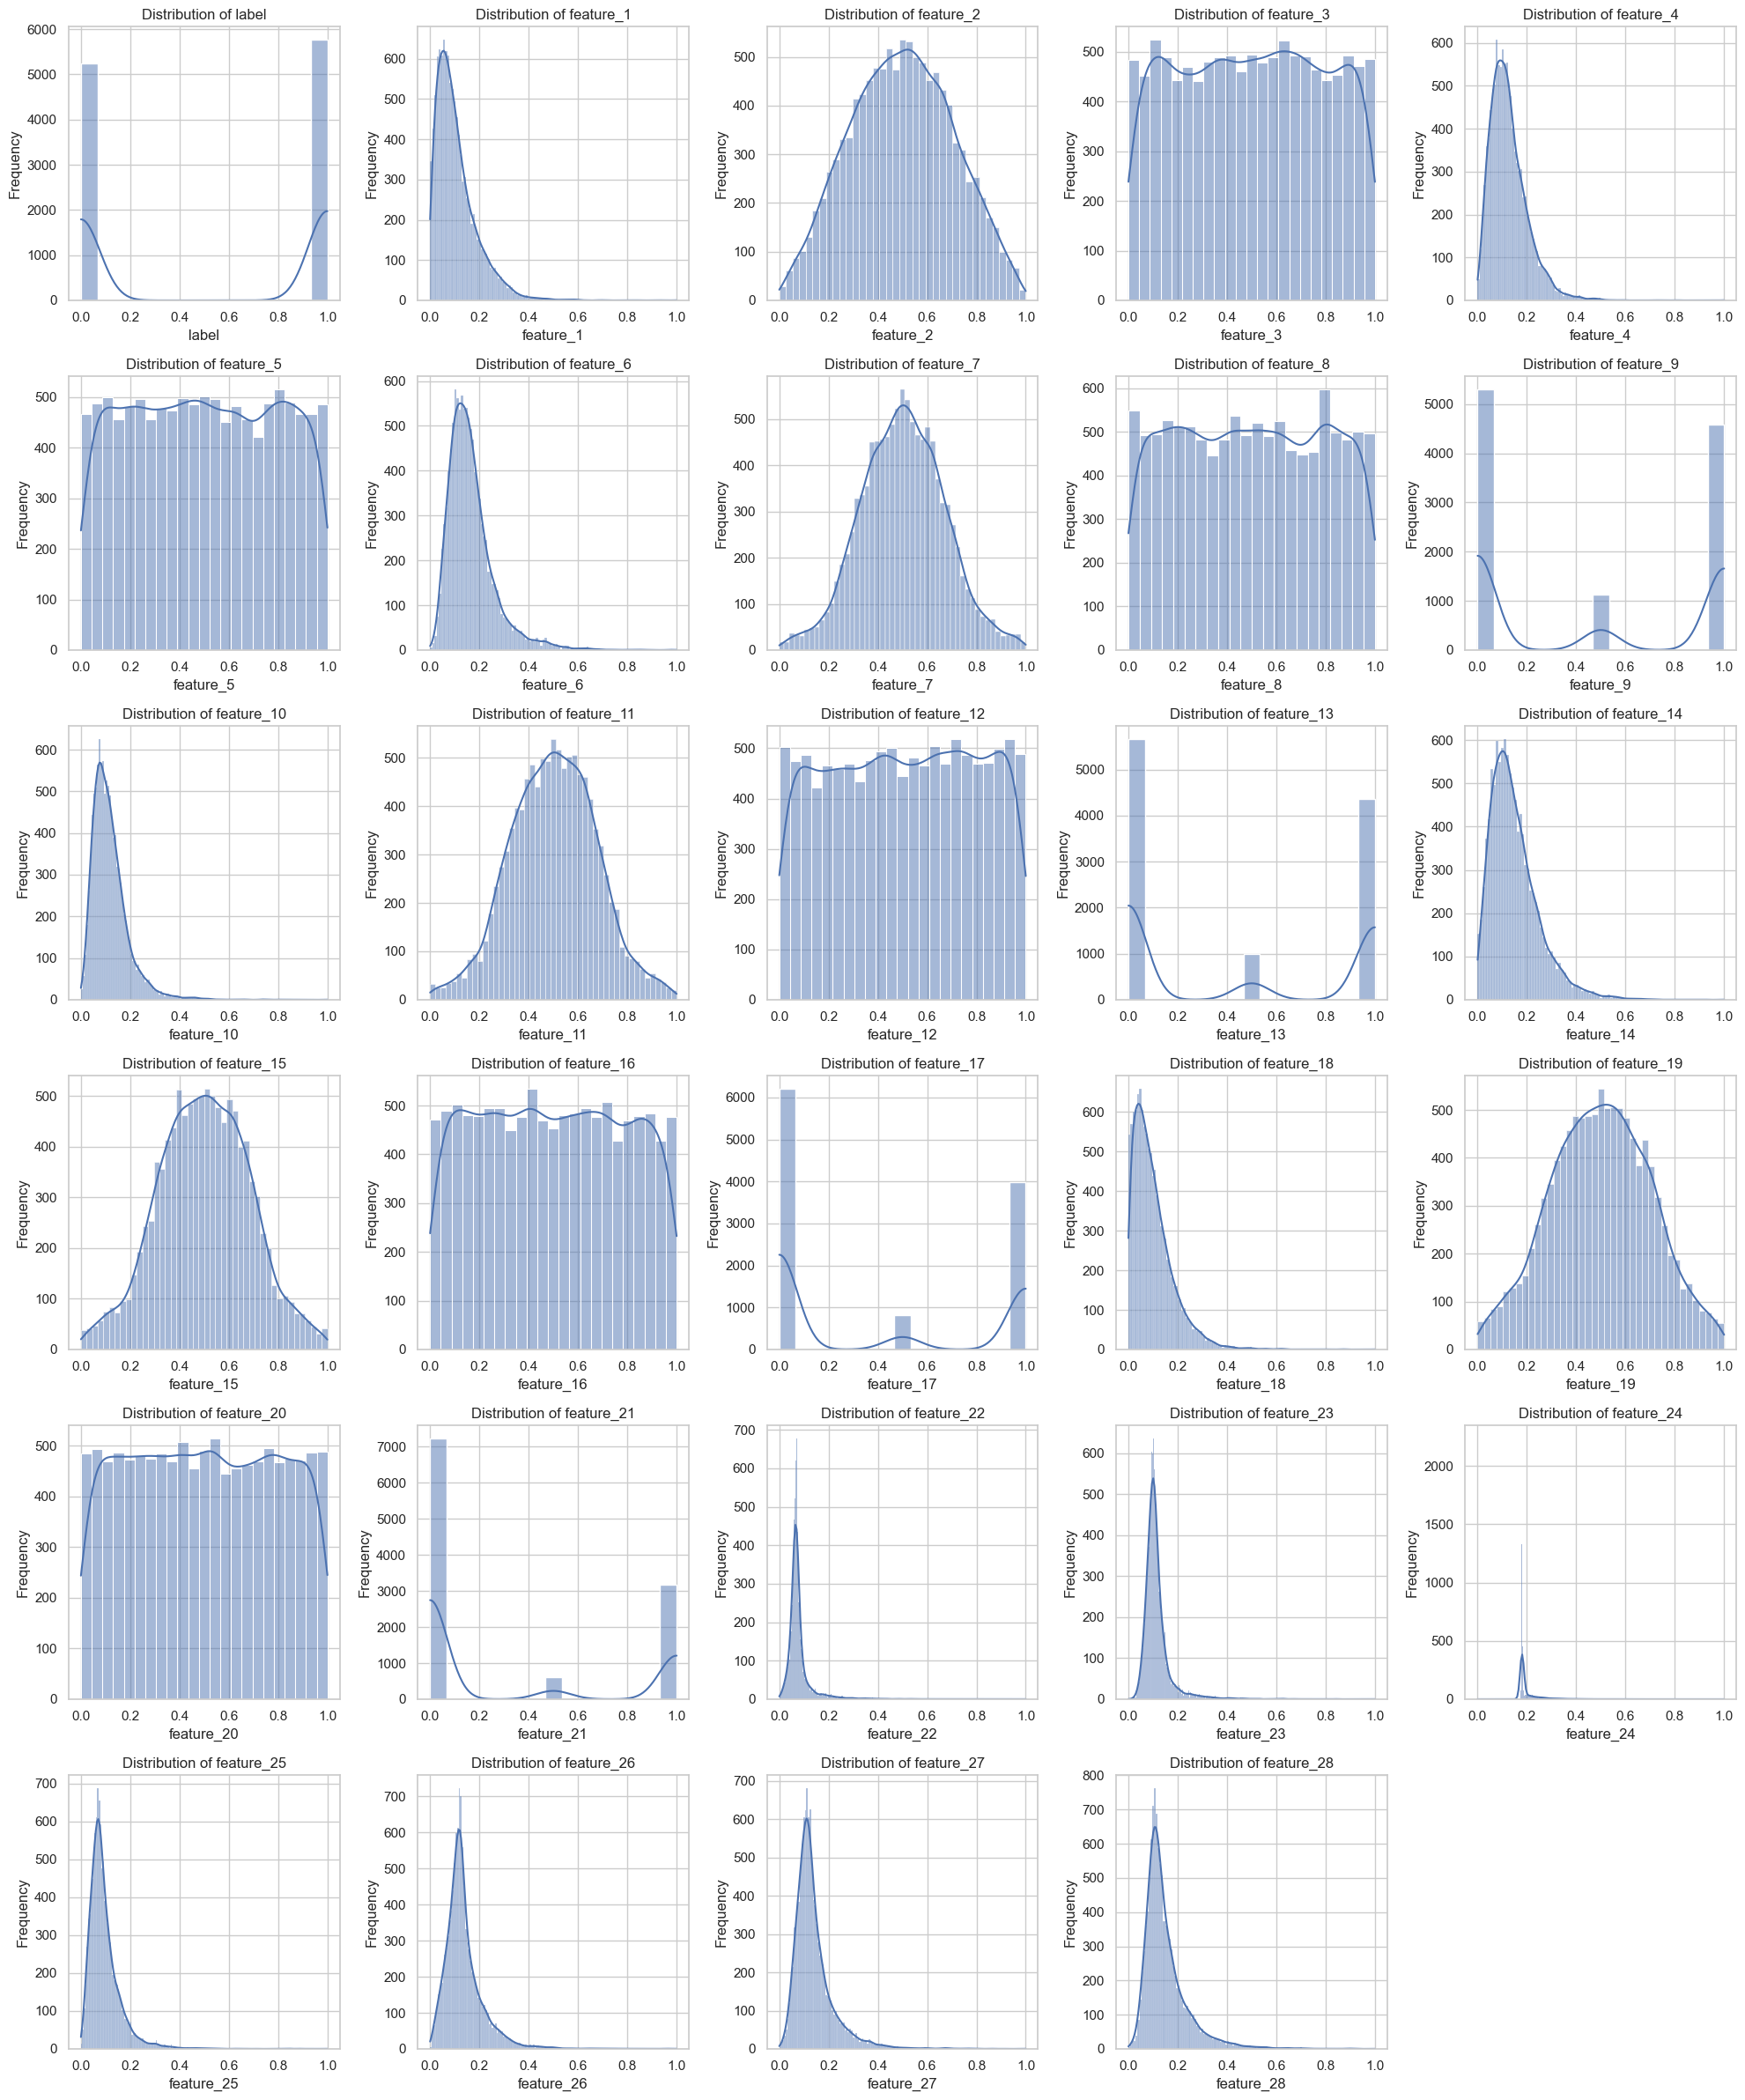

In [12]:
sns.set_theme(style="whitegrid")

num_features = len(df_normalized.columns)

num_cols = 5
num_rows = (num_features + num_cols - 1) // num_cols

# Grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(df_normalized.columns):
    sns.histplot(df_normalized[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

> we notice that some features have skewed distributions (i.e., the data is heavily concentrated on one side of the graph), it may affect the performance of machine learning models

* Apply a log transformation to reduce skewness.

* **Purpose**:
    * Applies a logarithmic transformation to the specified features in the DataFrame `df_normalized`.
* **Details**:
    * `np.log1p(x)`: Computes `log(1 + x)`, which is useful for transforming data that may contain zero values, as the logarithm of zero is undefined.
* **Outcome**:
    * The specified features in `df_normalized` are transformed using the logarithmic function, which can help reduce skewness and stabilize variance.

In [13]:
df_normalized['feature_1'] = np.log1p(df_normalized['feature_1'])
df_normalized['feature_4'] = np.log1p(df_normalized['feature_4'])
df_normalized['feature_6'] = np.log1p(df_normalized['feature_6'])
df_normalized['feature_10'] = np.log1p(df_normalized['feature_10'])
df_normalized['feature_14'] = np.log1p(df_normalized['feature_14'])
df_normalized['feature_18'] = np.log1p(df_normalized['feature_18'])
df_normalized['feature_22'] = np.log1p(df_normalized['feature_22'])
df_normalized['feature_23'] = np.log1p(df_normalized['feature_23'])
df_normalized['feature_24'] = np.log1p(df_normalized['feature_24'])
df_normalized['feature_25'] = np.log1p(df_normalized['feature_25'])
df_normalized['feature_26'] = np.log1p(df_normalized['feature_26'])
df_normalized['feature_27'] = np.log1p(df_normalized['feature_27'])
df_normalized['feature_28'] = np.log1p(df_normalized['feature_28'])

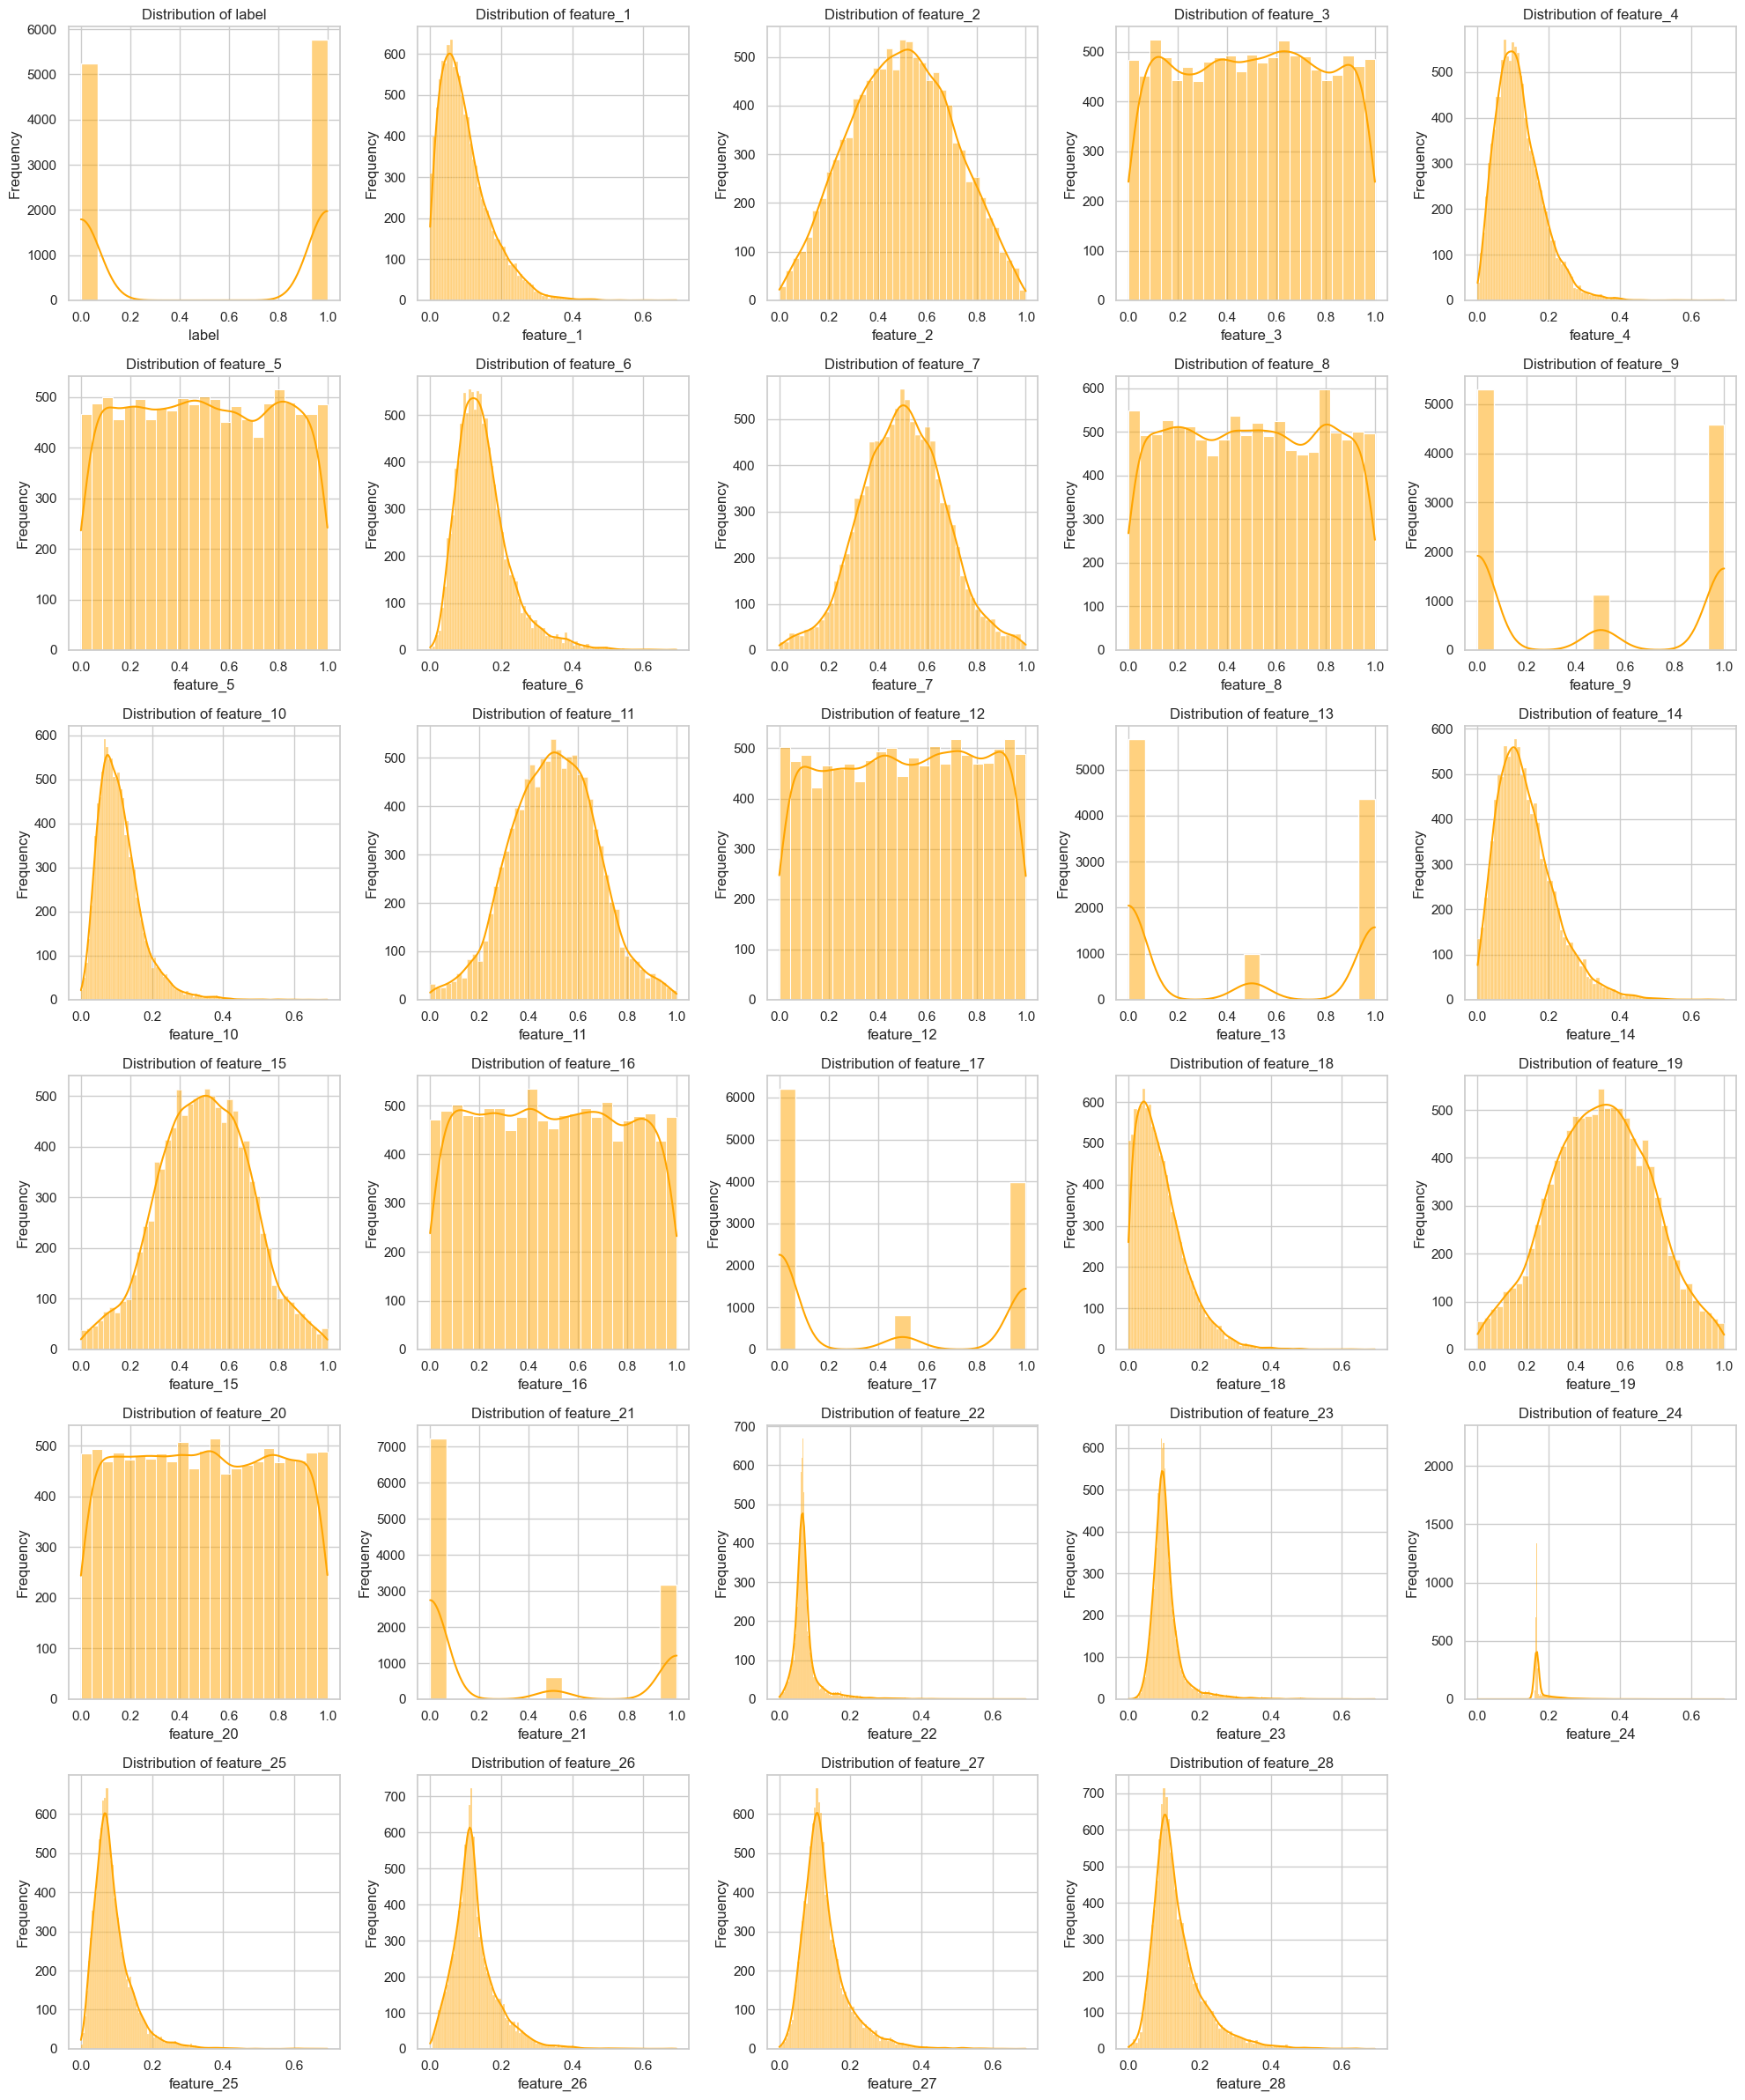

In [14]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(df_normalized.columns):
    sns.histplot(df_normalized[column], kde=True, ax=axes[i], color='orange')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


* performing normalization again after applying transformations


In [15]:
labels = df_normalized['label']
features = df_normalized.iloc[:, 1:]

features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

df_normalized = features_normalized.copy()
df_normalized['label'] = labels.values

last_column = df_normalized.pop(df_normalized.columns[-1])
df_normalized.insert(0, last_column.name, last_column)

df_normalized.head()


,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
0,1.0,0.054082,0.383537,0.297030,0.118148,0.701449,0.467919,0.292928,0.508770,0.0,...,0.453060,0.109993,0.0,0.066718,0.408883,0.236439,0.098339,0.189479,0.433607,0.385862
1,0.0,0.014138,0.513719,0.593295,0.453639,0.643521,0.439249,0.366828,0.126548,1.0,...,0.527097,0.870427,1.0,0.319531,0.315077,0.232538,0.555303,0.226087,0.440164,0.639903
2,1.0,0.288510,0.453034,0.116997,0.231361,0.562549,0.086213,0.406955,0.692305,0.0,...,0.743705,0.921843,0.0,0.106007,0.100734,0.623296,0.167066,0.121469,0.129021,0.124690
3,0.0,0.091518,0.334869,0.142625,0.112248,0.779019,0.121360,0.620966,0.970392,0.0,...,0.490412,0.757887,1.0,0.169298,0.134613,0.237358,0.083842,0.088817,0.101181,0.124920
4,0.0,0.011267,0.786501,0.824106,0.201420,0.704618,0.195158,0.649557,0.046958,1.0,...,0.432383,0.361976,1.0,0.090074,0.206367,0.240850,0.091161,0.233588,0.145832,0.146002


### Checking for any correlation between different features using heatmap

* Functions used:
    * `DataFrame.corr`:
        * **Description**: Computes the pairwise correlation of columns, excluding `NaN` values.
        * **Usage in Code**: Used to calculate the correlation matrix of the DataFrame `df_normalized`.

    * `sns.heatmap`:
        * **Description**: Draws a heatmap of the correlation matrix.
        * **Usage in Code**: Used to visualize the correlation matrix.

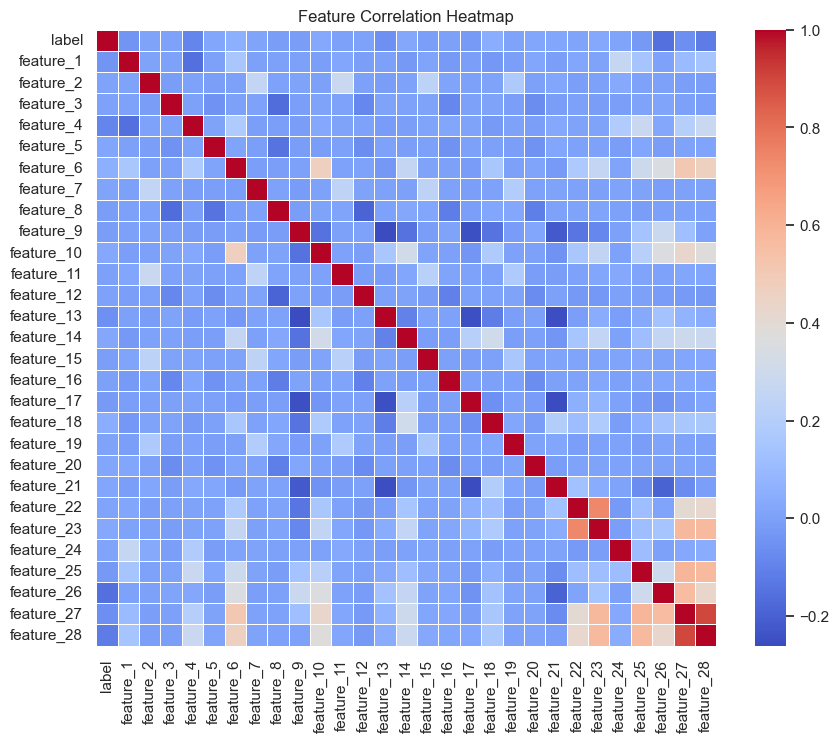

In [16]:
correlation_matrix = df_normalized.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

* **Visualizes the Distribution**
    * The boxplot shows the distribution of each feature, including the median, quartiles, and potential outliers.

* **Identifies Outliers**
    * Outliers are displayed as individual points outside the whiskers of the boxplot.
* **Compares Features**
    * By plotting all features in a single figure, we can easily compare their distributions and identify any features with significant outliers or skewness.


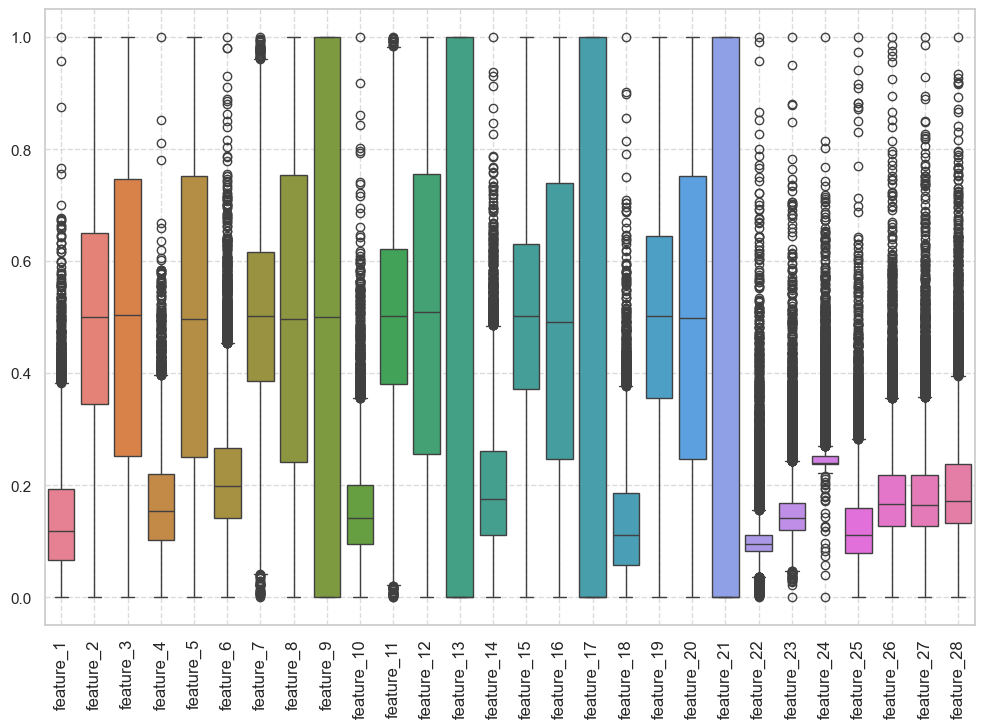

In [17]:
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_normalized.iloc[:, 1:])
plt.xticks(rotation=90, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Feature engineering

* **PolynomialFeatures**:
    * **Description**: A transformer that generates polynomial features up to a specified degree.
    * **Parameters**:
        * `degree`: The degree of the polynomial features. In this case, `degree=2` generates features up to the second degree (squares and interaction terms).
        * `include_bias`: If False, the bias (intercept) term is not included in the output.

In [18]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_normalized.iloc[:, 1:])  # Exclude the first column

poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(df_normalized.columns[1:]))

poly_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_25^2,feature_25 feature_26,feature_25 feature_27,feature_25 feature_28,feature_26^2,feature_26 feature_27,feature_26 feature_28,feature_27^2,feature_27 feature_28,feature_28^2
0,0.054082,0.383537,0.297030,0.118148,0.701449,0.467919,0.292928,0.508770,0.0,0.284241,...,0.009671,0.018633,0.042640,0.037945,0.035902,0.082159,0.073113,0.188015,0.167312,0.148889
1,0.014138,0.513719,0.593295,0.453639,0.643521,0.439249,0.366828,0.126548,1.0,0.172349,...,0.308362,0.125547,0.244425,0.355340,0.051115,0.099515,0.144674,0.193744,0.281662,0.409476
2,0.288510,0.453034,0.116997,0.231361,0.562549,0.086213,0.406955,0.692305,0.0,0.110645,...,0.027911,0.020293,0.021555,0.020831,0.014755,0.015672,0.015146,0.016646,0.016088,0.015548
3,0.091518,0.334869,0.142625,0.112248,0.779019,0.121360,0.620966,0.970392,0.0,0.194587,...,0.007029,0.007447,0.008483,0.010473,0.007889,0.008987,0.011095,0.010238,0.012640,0.015605
4,0.011267,0.786501,0.824106,0.201420,0.704618,0.195158,0.649557,0.046958,1.0,0.052031,...,0.008310,0.021294,0.013294,0.013310,0.054563,0.034065,0.034104,0.021267,0.021292,0.021317


> notice 434 columns = 28(single) + 28C2(interaction) + 28(squared)

### Feature Selection

We perform feature selection using the SelectKBest method and evaluate the performance of a RandomForestClassifier on the selected features. The code includes steps for splitting the dataset into training and testing sets, training the classifier, and determining the optimal number of features (k) using cross-validation.

* Libraries and Functions Used
    1. `sklearn.model_selection.train_test_split`

        * **Purpose**: Splits arrays or matrices into random train and test subsets.
        * **Usage in Code**: Used to split the dataset into training and testing sets.
    1. `sklearn.ensemble.RandomForestClassifier`

        * **Purpose**: A meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
        * **Usage in Code**: Used to train a RandomForestClassifier on the selected features.
    1. `sklearn.feature_selection.SelectKBest`

        * **Purpose**: Selects the k highest scoring features based on a scoring function.
        * **Usage in Code**: Used to select the top k features based on the ANOVA F-value between label/feature for classification tasks.
    1. `sklearn.feature_selection.f_classif`

        * **Purpose**: Computes the ANOVA F-value for the provided sample.
        * **Usage in Code**: Used as the scoring function for SelectKBest.
    1. `sklearn.metrics.accuracy_score`

        * **Purpose**: Computes the accuracy classification score.
        * **Usage in Code**: Used to evaluate the accuracy of the classifier.
    1. `sklearn.model_selection.cross_val_score`

        * **Purpose**: Evaluates a score by cross-validation.
        * **Usage in Code**: Used to perform cross-validation and compute the mean cross-validation score.

In [19]:
X = poly_df
y = df_normalized['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


# rfc = RandomForestClassifier(n_estimators=100, random_state=42)
# rfc.fit(X_train, y_train)

# y_pred = rfc.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# # range of k values to test
# k_values = range(1, 21)
# mean_scores = []

# for k in k_values:
#     selector = SelectKBest(score_func=f_classif, k=k)
#     X_train_selected = selector.fit_transform(X_train, y_train)
#     X_test_selected = selector.transform(X_test)
    
#     rfc = RandomForestClassifier(n_estimators=100, random_state=42)
#     scores = cross_val_score(rfc, X_train_selected, y_train, cv=5)
#     mean_scores.append(scores.mean())

# # highest mean cross-validation score
# optimal_k = k_values[mean_scores.index(max(mean_scores))]
optimal_k = 10
print(f"Optimal k: {optimal_k}")


X_train shape: (8800, 434)
X_test shape: (2200, 434)
y_train shape: (8800,)
y_test shape: (2200,)
Optimal k: 10


* Libraries and Functions Used
    * `sklearn.feature_selection.SelectKBest`
        * **Purpose**: Selects the k highest scoring features based on a scoring function.
        * **Usage in Code**: Used to select the top k features based on the ANOVA F-value between label/feature for classification tasks.
    * `sklearn.feature_selection.f_classif`
        * **Purpose**: Computes the ANOVA F-value for the provided sample.
        * **Usage in Code**: Used as the scoring function for SelectKBest.
    * `sklearn.ensemble.RandomForestClassifier`
        * **Purpose**: A meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
        * **Usage in Code**: Used to train a RandomForestClassifier on the selected features.
    * `sklearn.metrics.accuracy_score`
        * **Purpose**: Computes the accuracy classification score.
        * **Usage in Code**: Used to evaluate the accuracy of the classifier.

In [20]:
# optimal k to select features
selector = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
print(f"Selected features: {selected_features}")

print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_selected, y_train)

y_pred = rfc.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Selected features: Index(['feature_26', 'feature_4 feature_26', 'feature_4 feature_28',
       'feature_7 feature_26', 'feature_11 feature_26',
       'feature_15 feature_26', 'feature_24 feature_26', 'feature_26^2',
       'feature_26 feature_27', 'feature_26 feature_28'],
      dtype='object')
X_train_selected shape: (8800, 10)
X_test_selected shape: (2200, 10)
Accuracy: 0.66


In [21]:
# X and y to be only of the selected features
X = poly_df[selected_features]
y = df_normalized['label']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X shape: (11000, 10)
y shape: (11000,)
X_train shape: (8800, 10)
X_test shape: (2200, 10)
y_train shape: (8800,)
y_test shape: (2200,)


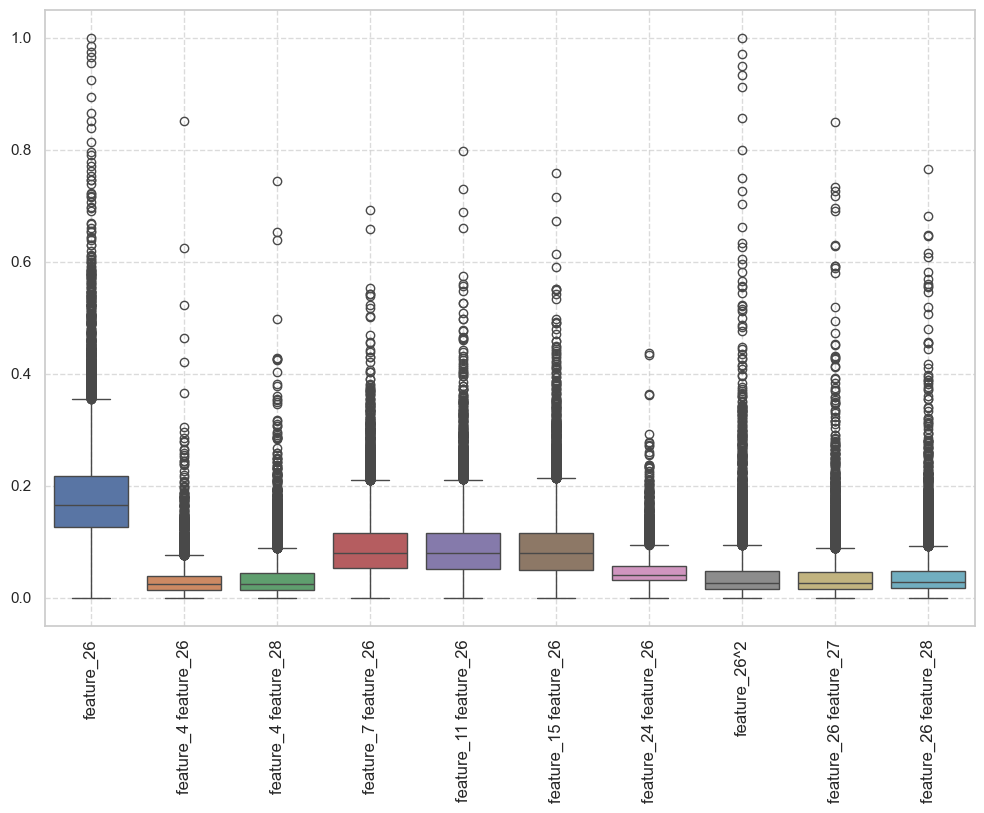

In [22]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=X)
plt.xticks(rotation=90, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 2. Linear SVM Implementation 

1. ### Linear Kernel
	* **Mathematical Expression**:  K(x,y)=x⋅y
	* **Explanation**: The linear kernel computes the inner product between two vectors. It is most suitable when the data is linearly separable or when the dataset's dimensionality is already high.
	* **Use Case**: Useful for high-dimensional space where adding non-linearity might lead to overfitting. It is simple and computationally efficient.
	* **Interpretation**: Each feature has a direct and proportional influence on the decision boundary.
2. ### Polynomial Kernel
	* **Mathematical Expression**: K(x,y)=(γx⋅y+r)<sup>d</sup>
		* γ (gamma): Scaling parameter.
		* r: Coefficient that allows for independent control of polynomial terms.
		* d: Degree of the polynomial.

	* **Explanation**: This kernel represents the similarity as a polynomial combination of the input features. It can model more complex relationships.
	* **Use Case**: Used when the relationship between data points is not linear but can be expressed as a polynomial relationship.
	* **Interpretation**: Higher degrees allow more complex boundaries but may increase the risk of overfitting.
3. ### Radial Basis Function (RBF) Kernel / Gaussian Kernel
	* **Mathematical Expression**: K(x,y)=exp(−γ∣∣x−y∣∣<sup>2</sup>)
		* γ: Controls the spread of the kernel (higher γ leads to a tighter fit).
	* **Explanation**: This is one of the most commonly used kernels. It measures similarity based on the distance between vectors in the feature space.
	* **Use Case**: Effective when there is no prior knowledge about the data's distribution. It can capture non-linear patterns well.
	* **Interpretation**: Points close in space have a high similarity (close to 1), while distant points have low similarity (close to 0).
4. ### Sigmoid Kernel
	* **Mathematical Expression**: K(x,y)=tanh(γx⋅y+r)
		* γ: Scaling parameter.
		* r: Coefficient to shift the curve.
	* **Explanation**: The sigmoid kernel function is inspired by the neural activation function and behaves like a two-layer perceptron. It can be used for non-linear decision boundaries.
	* **Use Case**: Used in situations where SVMs resemble neural network behavior, but it may not satisfy the Mercer's condition in some cases (leading to non-positive definite kernels).
	* **Interpretation**: The output is bounded between -1 and 1, resembling the behavior of logistic functions in neural networks.
5. ### Custom Kernel (Sigmoid Example)
	* **Mathematical Expression**: Custom implementation in the provided code:
		```
		def sigmoid_custom_kernel(X, Y):
			return sigmoid_kernel(X, Y, gamma=0.1, coef0=1.0)
		```
	* Explanation: This implementation allows defining a custom behavior for kernel calculations, such as specific parameter tuning for particular datasets.
	* Use Case: Provides flexibility to experiment with tailored non-linear transformations for data.
	* Interpretation: Tailoring γ and coef0 can adjust the kernel's sensitivity to the data's feature interactions.

### SVM with a Linear Kernel 


Training time: 1.318193 seconds
Accuracy: 0.59
              precision    recall  f1-score   support

         0.0       0.75      0.20      0.32      1045
         1.0       0.57      0.94      0.71      1155

    accuracy                           0.59      2200
   macro avg       0.66      0.57      0.51      2200
weighted avg       0.65      0.59      0.52      2200

AUC: 0.61
Cross-validation scores: [0.57784091 0.57897727 0.57840909 0.58011364 0.575     ]
Mean cross-validation score: 0.58


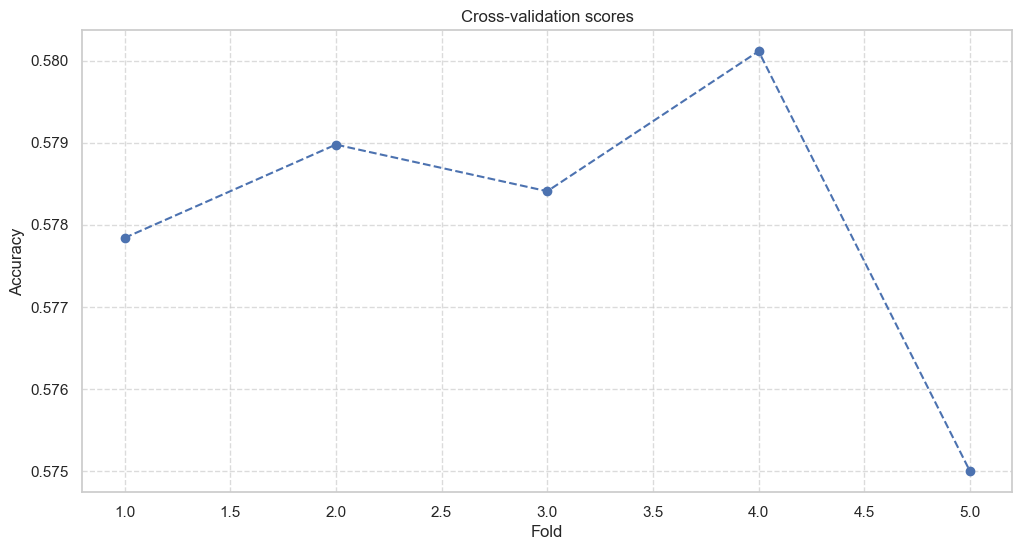

In [23]:
svc = SVC(kernel='linear', random_state=42)

# Performing cross-validation
cv_scores = cross_val_score(svc, X_train_selected, y_train, cv=5)

start_time = time.time()
svc.fit(X_train_selected, y_train)
end_time = time.time()
print(f"Training time: {end_time - start_time:.6f} seconds")

# Predicting on the test set
y_pred = svc.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

y_pred_proba = svc.decision_function(X_test_selected)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {roc_auc:.2f}")

# Cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.2f}")

#plot the cross-validation scores
plt.figure(figsize=(12, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='b')
plt.title('Cross-validation scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Implementing SVM with Stochastic Gradient Descent
By using SGD, the algorithm only needs to keep a small portion of the data in memory at any time, making it suitable for very large datasets.

#### SGD is implemented in the `fit` method as :
1. Shuffling the Data:
    * The data is shuffled at the beginning of each iteration to ensure that the model does not learn in a specific order, which helps in better generalization.
2. Processing Data in Batches:
    * The data is processed in mini-batches of size `batch_size`. This is a variant of SGD called Mini-batch Gradient Descent.
3. Updating Weights and Bias:
    * For each mini-batch, the code iterates over each sample (`x_i`) and its corresponding label (`y_batch[idx]`).
    * The condition `y_batch[idx] * (np.dot(x_i, self.w) - self.b) >= 1` checks if the sample is correctly classified with a margin.
    * If the condition is met (correctly classified with margin), the weights are updated with the regularization term only:
        ```
        self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
        ```
    * If the condition is not met (misclassified or within the margin), the weights and bias are updated to reduce the hinge loss:
        ```
        self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_batch[idx]))
        self.b -= self.learning_rate * y_batch[idx]
        ```
    * This process is repeated for the specified number of iterations (`n_iters`), gradually adjusting the weights and bias to minimize the loss function.

In [24]:
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000, batch_size=32):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1 and 1

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            # Shuffle the data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y_[indices]

            for start in range(0, n_samples, self.batch_size):
                end = start + self.batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                for idx, x_i in enumerate(X_batch):
                    condition = y_batch[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                    if condition:
                        self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                    else:
                        self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_batch[idx]))
                        self.b -= self.learning_rate * y_batch[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)
    
    def accuracy(self, y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)
    

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = LinearSVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000, batch_size=32)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = svm.accuracy(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


### Scalability and Efficiency

* **Stochastic Gradient Descent (SGD):**
    * **Overview**: Instead of computing gradients on the entire dataset (like in batch gradient descent), SGD updates the model parameters for each data point (or a small subset), reducing memory usage and speeding up convergence.
    * **Benefits**: Lower memory requirement, faster convergence, and efficient for large datasets.
    * **Drawbacks**: Can be noisy due to single-sample updates, so often requires more epochs to reach an optimal solution.

* **Mini-Batch Gradient Descent:**
    * **Overview**: This method divides the dataset into small batches, then updates the model parameters after each batch, reducing computational load per update.
    * **Benefits**: Balances between the stability of batch gradient descent and the speed of SGD, ideal for large datasets.
    * **Drawbacks**: Can still be slower than SGD, and tuning batch size is crucial for optimal performance.

## 3. SVM with Polynomial, RBF, and Custom Kernels

### Polynomial Kernel

1. **Parameter Grid Definition**:
    * `param_grid_poly` defines the hyperparameters to be tuned: `C` (regularization parameter) and `degree` (polynomial degree).
2. **Grid Search Setup**:
    * An `SVC` estimator with a polynomial kernel is created.
    * `GridSearchCV` is used to perform a grid search over the specified parameter grid with 5-fold cross-validation (`cv=5`).
3. **Model Training**:
    * The grid search is fitted to the training data (`X_train_selected`, `y_train`).
4. **Best Parameters and Evaluation**:
    * The best hyperparameters found by the grid search are printed.
    * Predictions are made on the test data (X_test_selected).
    * The accuracy, classification report, and AUC score of the model with the best parameters are printed.
5. **Results Comparison**:
    * The mean test scores for different parameter combinations are printed.
6. **Plotting Mean Test Scores**:
    * A scatter plot is created to visualize the mean test scores for different polynomial degrees.
    * Different colors are used to highlight different `C` values.
    * A legend is created to indicate the `C` values.

Best Polynomial Kernel Parameters: {'C': 10, 'degree': 2, 'kernel': 'poly'}
Polynomial Kernel Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.30      0.43      1045
         1.0       0.59      0.91      0.72      1155

    accuracy                           0.62      2200
   macro avg       0.67      0.60      0.57      2200
weighted avg       0.67      0.62      0.58      2200

AUC Score: 0.6042606516290727
Mean Test Score: 0.58 for Parameters: {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
Mean Test Score: 0.59 for Parameters: {'C': 0.1, 'degree': 3, 'kernel': 'poly'}
Mean Test Score: 0.59 for Parameters: {'C': 0.1, 'degree': 4, 'kernel': 'poly'}
Mean Test Score: 0.59 for Parameters: {'C': 1, 'degree': 2, 'kernel': 'poly'}
Mean Test Score: 0.60 for Parameters: {'C': 1, 'degree': 3, 'kernel': 'poly'}
Mean Test Score: 0.59 for Parameters: {'C': 1, 'degree': 4, 'kernel': 'poly'}
Mean Test Score: 0.60 for Parameters

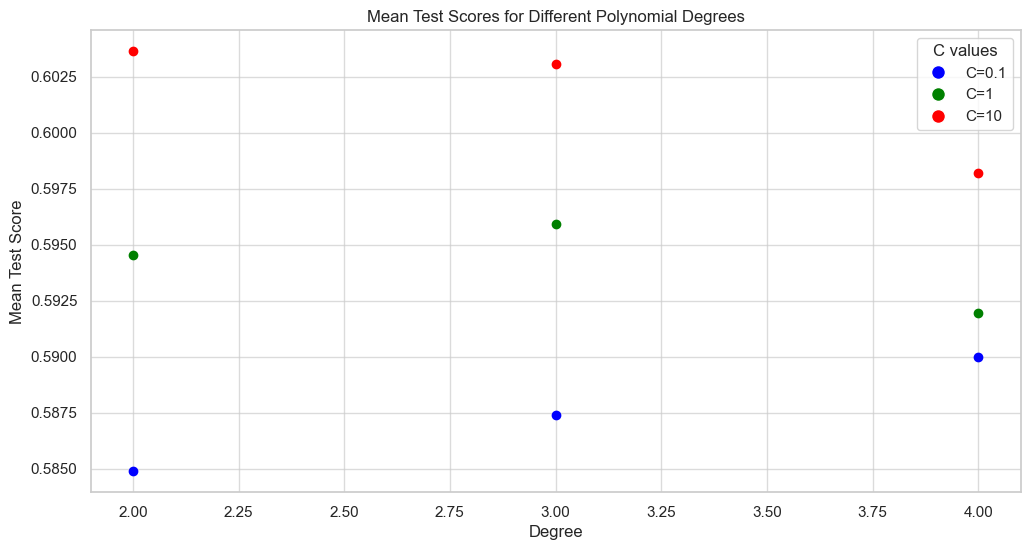

In [25]:
# Parameter grid for Polynomial Kernel
param_grid_poly = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],  # Polynomial degrees
    'kernel': ['poly'],
}

# Polynomial Kernel SVM with Grid Search
poly_svc = SVC()
grid_poly = GridSearchCV(estimator=poly_svc, param_grid=param_grid_poly, scoring='accuracy', cv=5)
grid_poly.fit(X_train_selected, y_train)

# Best parameters and evaluation
print(f"Best Polynomial Kernel Parameters: {grid_poly.best_params_}")
y_pred_poly = grid_poly.predict(X_test_selected)
print(f"Polynomial Kernel Accuracy: {accuracy_score(y_test, y_pred_poly):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_poly))
print("AUC Score:", roc_auc_score(y_test, y_pred_poly))

# Comparing results for different degrees
results = grid_poly.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Test Score: {mean_score:.2f} for Parameters: {params}")

# Plotting mean test scores for different polynomial degrees
mean_scores = results['mean_test_score']
degrees = [params['degree'] for params in results['params']]
C_values = [params['C'] for params in results['params']]

plt.figure(figsize=(12, 6))

# Highlight different C values with different colors
colors = {0.1: 'blue', 1: 'green', 10: 'red'}
for i, (degree, mean_score, C_value) in enumerate(zip(degrees, mean_scores, C_values)):
    plt.scatter(degree, mean_score, color=colors[C_value], label=f'C={C_value}' if i == 0 else "")

# Create a legend for C values
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'C={C_value}') for C_value, color in colors.items()]
plt.legend(handles=handles, title='C values')

plt.title('Mean Test Scores for Different Polynomial Degrees')
plt.xlabel('Degree')
plt.ylabel('Mean Test Score')
plt.grid(True, alpha=0.7)
plt.show()



### RBF Kernel

1. **Parameter Grid Definition**:
    * `param_grid_rbf` defines the hyperparameters to be tuned: `C` (regularization parameter) and `gamma` (kernel coefficient).

2. **Grid Search Setup**:
    * An `SVC` estimator with an RBF kernel is created.
    * `GridSearchCV` is used to perform a grid search over the specified parameter grid with 5-fold cross-validation (`cv=5`).
3. **Model Training**:
    * The grid search is fitted to the training data (`X_train`, `y_train`).
4. **Best Parameters and Evaluation**:
    * The best hyperparameters found by the grid search are printed.
    * Predictions are made on the test data (`X_test`).
    * The accuracy, classification report, and AUC score of the model with the best parameters are printed.
5. **Results Comparison**:
    * The mean test scores for different parameter combinations are printed.
6. **Plotting Mean Test Scores**:
    * A scatter plot is created to visualize the mean test scores for different `gamma` values.
    * Different colors are used to highlight different `C` values.
    * A legend is created to indicate the `C` values.


Best RBF Kernel Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
RBF Kernel Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

         0.0       0.66      0.62      0.64      1045
         1.0       0.67      0.71      0.69      1155

    accuracy                           0.67      2200
   macro avg       0.67      0.66      0.66      2200
weighted avg       0.67      0.67      0.67      2200

AUC Score: 0.6645021645021645
Mean Test Score: 0.59 for Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Test Score: 0.63 for Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Test Score: 0.64 for Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mean Test Score: 0.61 for Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Test Score: 0.65 for Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Test Score: 0.65 for Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Mean Test Score: 0.63 for Parameters: {'C': 10, 'gam

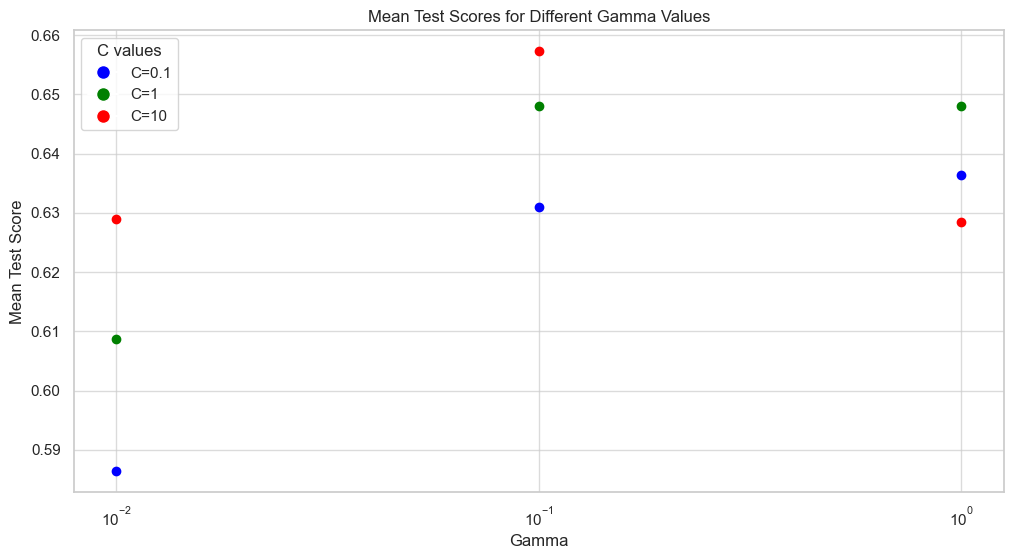

In [26]:
# parameter grid for RBF Kernel
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf'],
}

# RBF Kernel SVM with Grid Search
rbf_svc = SVC()
grid_rbf = GridSearchCV(estimator=rbf_svc, param_grid=param_grid_rbf, scoring='accuracy', cv=5)
grid_rbf.fit(X_train, y_train)

# Best parameters and evaluation
print(f"Best RBF Kernel Parameters: {grid_rbf.best_params_}")
y_pred_rbf = grid_rbf.predict(X_test)
print(f"RBF Kernel Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))
print("AUC Score:", roc_auc_score(y_test, y_pred_rbf))

# Comparing results for different gamma values
results = grid_rbf.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Test Score: {mean_score:.2f} for Parameters: {params}")


# Plotting mean test scores for different gamma values
mean_scores = results['mean_test_score']
gammas = [params['gamma'] for params in results['params']]
C_values = [params['C'] for params in results['params']]
colors = {0.1: 'blue', 1: 'green', 10: 'red'}

plt.figure(figsize=(12, 6))

for i, (gamma, mean_score, C_value) in enumerate(zip(gammas, mean_scores, C_values)):
    plt.scatter(gamma, mean_score, color=colors[C_value], label=f'C={C_value}' if i == 0 else "")

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'C={C_value}') for C_value, color in colors.items()]
plt.legend(handles=handles, title='C values')
plt.title('Mean Test Scores for Different Gamma Values')
plt.xlabel('Gamma')
plt.ylabel('Mean Test Score')
plt.xscale('log')
plt.grid(True, alpha=0.7)
plt.show()



### Custom Kernel
* #### Sigmoid kernel

1. **Custom Kernel Function**:
    * `sigmoid_custom_kernel` is defined using the sigmoid_kernel function with specific gamma and coef0 parameters.
2. **Grid Search Setup**:
    * An `SVC` estimator with the custom sigmoid kernel is created.
    * `param_grid_custom` defines the hyperparameters to be tuned: `C` (regularization parameter).
    * `GridSearchCV` is used to perform a grid search over the specified parameter grid with 5-fold cross-validation (`cv=5`).
3. **Model Training**:
    * The grid search is fitted to the training data (`X_train`, `y_train`).
4. **Best Parameters and Evaluation**:
    * The best hyperparameters found by the grid search are printed.
    * Predictions are made on the test data (`X_test`).
    * The accuracy, classification report, and AUC score of the model with the best parameters are printed.
5. **Results Comparison**:
    * The mean test scores for different parameter combinations are printed.
6. **Plotting Mean Test Scores**:
    * A scatter plot is created to visualize the mean test scores for different `C` values.
    * Different colors are used to highlight different `C` values.
    * A legend is created to indicate the C values.


Best Custom Kernel Parameters: {'C': 0.1}
Custom Kernel Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.59      0.60      1045
         1.0       0.64      0.65      0.64      1155

    accuracy                           0.62      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.62      0.62      0.62      2200

AUC Score: 0.618591934381408
Mean Test Score: 0.57 for Parameters: {'C': 0.1}
Mean Test Score: 0.49 for Parameters: {'C': 1}
Mean Test Score: 0.53 for Parameters: {'C': 10}


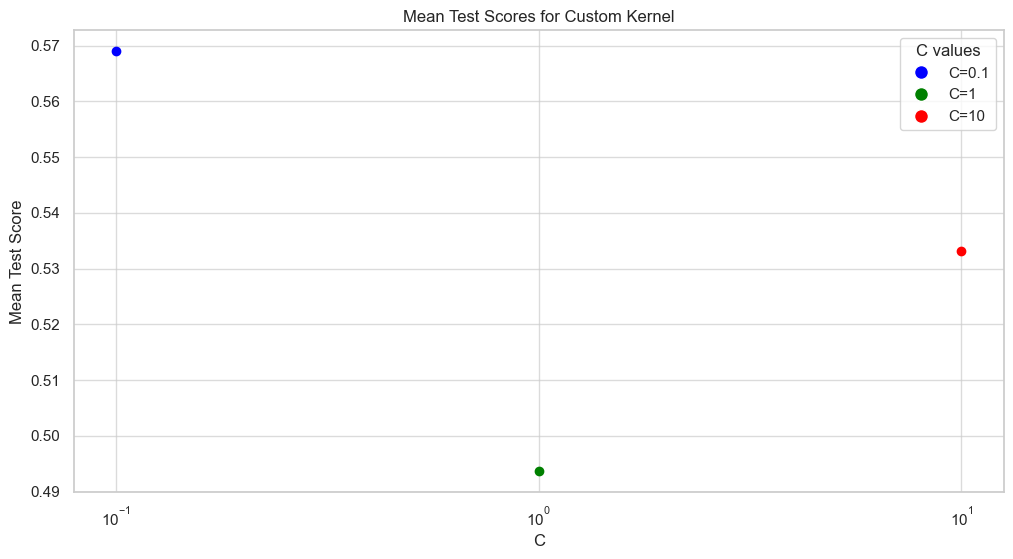

In [27]:
# custom kernel function
def sigmoid_custom_kernel(X, Y):
    return sigmoid_kernel(X, Y, gamma=0.1, coef0=1.0)

# SVM with Custom Kernel
custom_svc = SVC(kernel=sigmoid_custom_kernel)
param_grid_custom = {'C': [0.1, 1, 10]}  # regularization parameter

grid_custom = GridSearchCV(estimator=custom_svc, param_grid=param_grid_custom, scoring='accuracy', cv=5)
grid_custom.fit(X_train, y_train)

# Best parameters and evaluation
print(f"Best Custom Kernel Parameters: {grid_custom.best_params_}")
y_pred_custom = grid_custom.predict(X_test)
print(f"Custom Kernel Accuracy: {accuracy_score(y_test, y_pred_custom):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("AUC Score:", roc_auc_score(y_test, y_pred_custom))

# Comparing results for different gamma values
results = grid_custom.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean Test Score: {mean_score:.2f} for Parameters: {params}")


mean_scores = results['mean_test_score']
C_values = [params['C'] for params in results['params']]
colors = {0.1: 'blue', 1: 'green', 10: 'red'}

plt.figure(figsize=(12, 6))

for i, (mean_score, C_value) in enumerate(zip(mean_scores, C_values)):
    plt.scatter(C_value, mean_score, color=colors[C_value], label=f'C={C_value}' if i == 0 else "")

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'C={C_value}') for C_value, color in colors.items()]
plt.legend(handles=handles, title='C values')
plt.title('Mean Test Scores for Custom Kernel')
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Mean Test Score')
plt.grid(True, alpha=0.7)
plt.show()

### Comparison of the performance of each kernel

* **Accuracy Scores**:
`accuracy_scores` stores the accuracy of the predictions for each model.
* **AUC Scores**:
`auc_scores` stores the AUC scores of the predictions for each model.
* **Training Times**:
`training_times` stores the mean training times for each model from the cross-validation results.
* **Plotting**:
    * A figure with three subplots is created to display the accuracy, AUC scores, and mean training times.
    * Each subplot is a bar chart with the models on the x-axis and the respective metric on the y-axis.

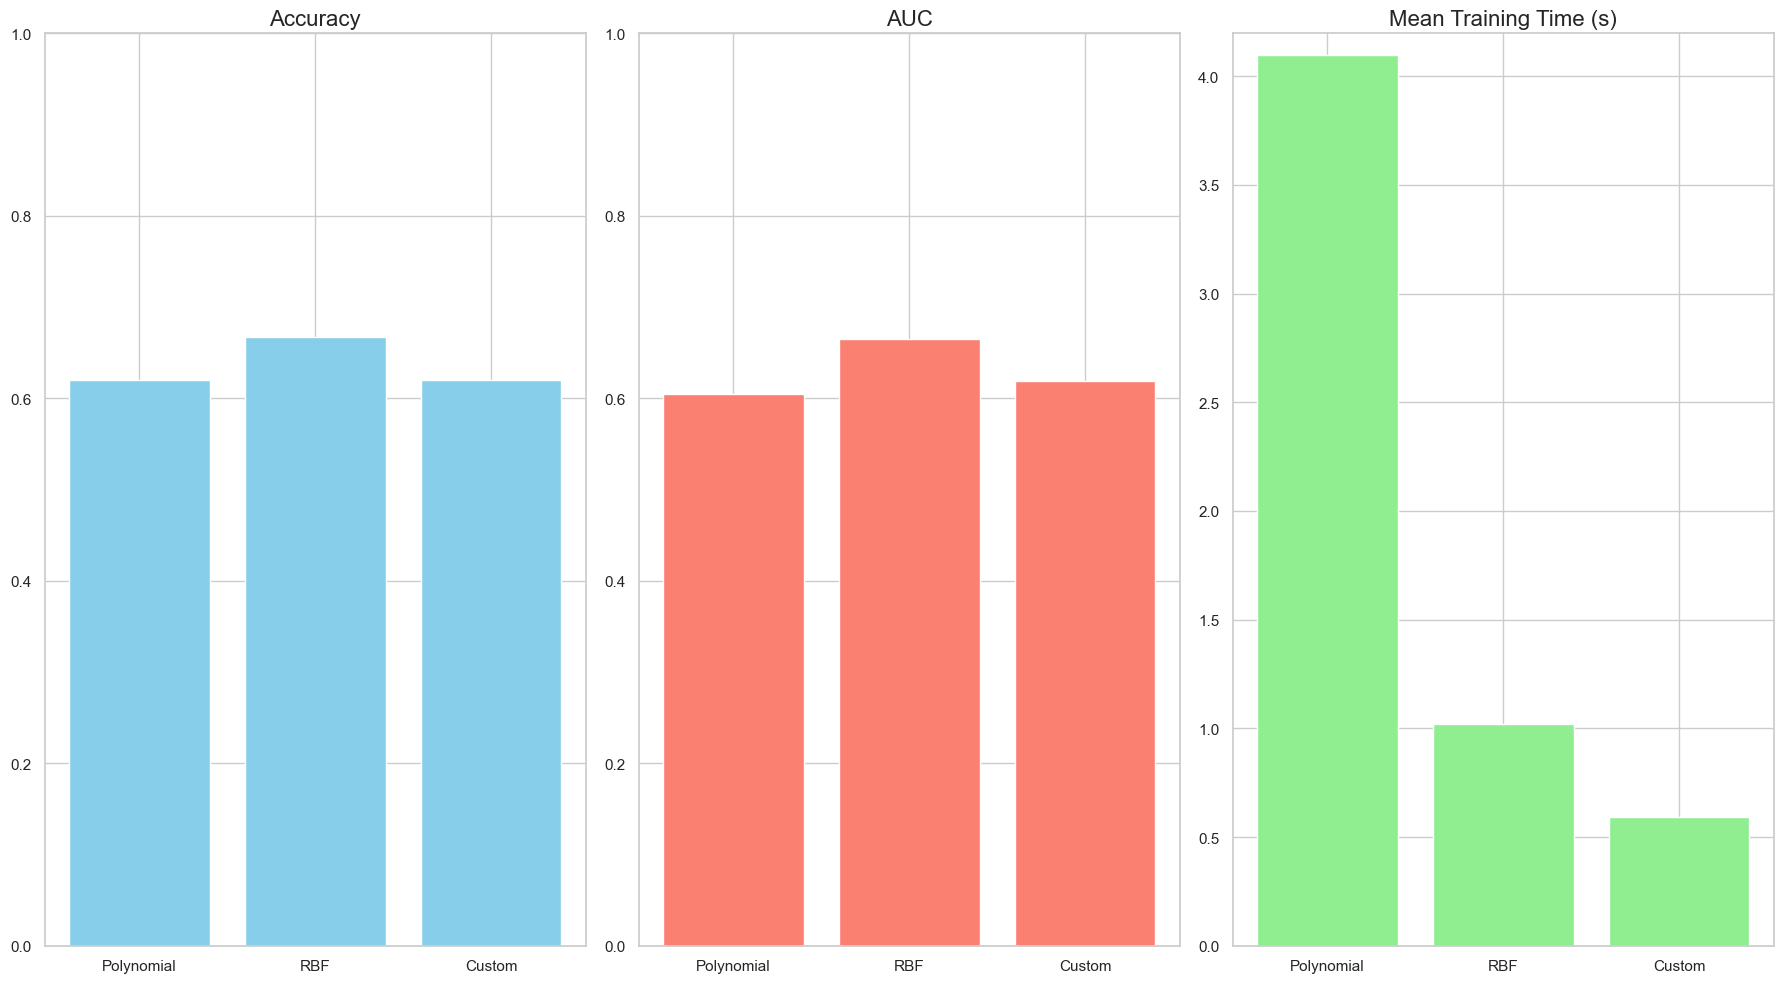

In [28]:
# Accuracy
accuracy_scores = [accuracy_score(y_test, y_pred_poly), accuracy_score(y_test, y_pred_rbf), accuracy_score(y_test, y_pred_custom)]

# AUC
auc_scores = [roc_auc_score(y_test, y_pred_poly), roc_auc_score(y_test, y_pred_rbf), roc_auc_score(y_test, y_pred_custom)]

# Training Time
training_times = [np.mean(grid_poly.cv_results_['mean_fit_time']), np.mean(grid_rbf.cv_results_['mean_fit_time']), np.mean(grid_custom.cv_results_['mean_fit_time'])]

# Plot
fig, ax = plt.subplots(1, 3, figsize=(18, 10))

# Accuracy
ax[0].bar(['Polynomial', 'RBF', 'Custom'], accuracy_scores, color='skyblue')
ax[0].set_title('Accuracy', fontsize=16)
ax[0].set_ylim(0, 1)

# AUC
ax[1].bar(['Polynomial', 'RBF', 'Custom'], auc_scores, color='salmon')
ax[1].set_title('AUC', fontsize=16)
ax[1].set_ylim(0, 1)

# Training Time
ax[2].bar(['Polynomial', 'RBF', 'Custom'], training_times, color='lightgreen')
ax[2].set_title('Mean Training Time (s)', fontsize=16)
ax[2].set_ylim(0, max(training_times) + 0.1)

plt.tight_layout()
plt.show()

> * RBF Kernel has the highest accuracy and AUC score
> * Custom Kernel has the lowest computational complexity
> * Polynomial Kernel has the highest computational complexity


### **Time Complexity Analysis**

### Time Complexity Analysis of SVM Kernels: Linear, Polynomial, and RBF

Below is an analysis of the time complexity for different SVM kernel functions along with their mathematical explanations:

#### 1. Linear Kernel
- **Mathematical Expression**:
  $$
  K(\mathbf{x}, \mathbf{y}) = \mathbf{x} \cdot \mathbf{y}
  $$
- **Time Complexity**:
  - **Training Complexity**: $ O(n^2 \cdot d) $
    - $ n $: Number of training samples.
    - $ d $: Number of features.
- **Explanation**: The linear kernel computes the dot product between vectors, which has a time complexity of $ O(d) $. Evaluating this for all training pairs gives an overall complexity of $ O(n^2 \cdot d) $.
- **Benefit**: Efficient for high-dimensional data, with fast computation and linear decision boundaries.

#### 2. Polynomial Kernel
- **Mathematical Expression**:
  $$
  K(\mathbf{x}, \mathbf{y}) = (\gamma \mathbf{x} \cdot \mathbf{y} + r)^{deg}
  $$
  - $ \gamma $: Scaling parameter.
  - $ r $: Coefficient to shift the kernel.
  - $ deg $: Degree of the polynomial.
- **Time Complexity**:
  - **Training Complexity**: $ O(n^2 \cdot d^{deg}) $
- **Explanation**: The polynomial kernel involves a dot product $ \mathbf{x} \cdot \mathbf{y} $ followed by raising the result to the power $ deg $. The complexity increases with higher degrees.
- **Comparison**: More flexible decision boundaries but higher degrees result in greater computational costs.

#### 3. RBF (Radial Basis Function) Kernel
- **Mathematical Expression**:
  $$
  K(\mathbf{x}, \mathbf{y}) = \exp(-\gamma ||\mathbf{x} - \mathbf{y}||^2)
  $$
  - $ \gamma $: Parameter controlling the width of the kernel.
- **Time Complexity**:
  - **Training Complexity**: $ O(n^2 \cdot d) $
- **Explanation**: The RBF kernel requires calculating the squared Euclidean distance $ ||\mathbf{x} - \mathbf{y}||^2 $, which has a time complexity of $ O(d) $. This is evaluated for each pair of training points, leading to $ O(n^2 \cdot d) $ overall.
- **Benefit**: Capable of modeling complex, non-linear boundaries but computationally more intensive than linear kernels.
    >The RBF kernel often has higher computational cost during training due to the need for pairwise distance calculations, particularly on large datasets.

### Mathematical and Computational Analysis
- **Linear Kernel**:
  - Simple and computationally efficient, ideal for high-dimensional feature spaces.
- **Polynomial Kernel**:
  - Higher degrees lead to more complex, non-linear boundaries but with increased computational cost.
- **RBF Kernel**:
  - Effective for capturing non-linear relationships. The $ O(n^2) $ factor makes it slower for large datasets.

### Comparison of Complexity
- **Linear Kernel**: $ O(n^2 \cdot d) $
- **Polynomial Kernel** (degree $ deg $): $ O(n^2 \cdot d^{deg}) $
- **RBF Kernel**: $ O(n^2 \cdot d) $

### Implications for Large Datasets
- **Linear Kernel**: Best for large-scale, linearly separable data.
- **Polynomial Kernel**: Suitable for smaller or moderately-sized datasets.
- **RBF Kernel**: Works well for complex, non-linear data but may be computationally prohibitive for very large datasets.

Choosing the appropriate kernel depends on data structure, resources, and the required model complexity.


#### Comparison of the time complexity of each kernel

Polynomial Kernel Training Time: 4.0967 seconds
RBF Kernel Training Time: 1.0186 seconds
Custom Kernel Training Time: 0.5940 seconds
Polynomial Kernel Prediction Time: 0.212792 seconds
RBF Kernel Prediction Time: 0.691917 seconds
Custom Kernel Prediction Time: 0.188266 seconds


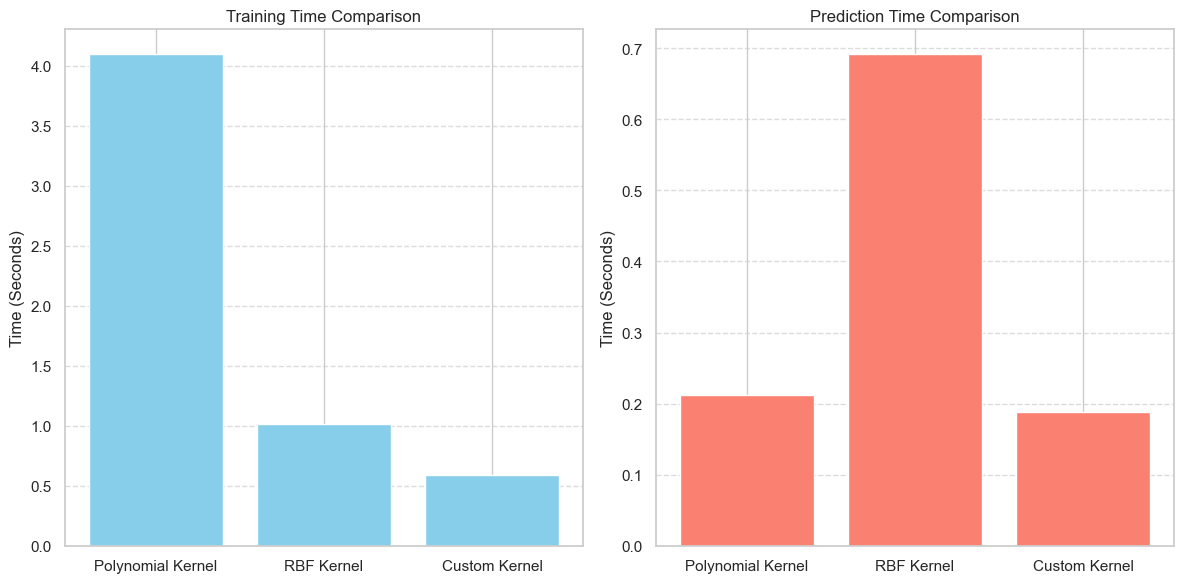

In [29]:
print(f"Polynomial Kernel Training Time: {np.mean(grid_poly.cv_results_['mean_fit_time']):.4f} seconds")
print(f"RBF Kernel Training Time: {np.mean(grid_rbf.cv_results_['mean_fit_time']):.4f} seconds")
print(f"Custom Kernel Training Time: {np.mean(grid_custom.cv_results_['mean_fit_time']):.4f} seconds")


# Polynomial Kernel
start_time = time.time()
y_pred_poly = grid_poly.predict(X_test_selected)
end_time = time.time()
poly_prediction_time = end_time - start_time
print(f"Polynomial Kernel Prediction Time: {poly_prediction_time:.6f} seconds")

# RBF Kernel
start_time = time.time()
y_pred_rbf = grid_rbf.predict(X_test)
end_time = time.time()
rbf_prediction_time = end_time - start_time
print(f"RBF Kernel Prediction Time: {rbf_prediction_time:.6f} seconds")

# Custom Kernel
start_time = time.time()
y_pred_custom = grid_custom.predict(X_test)
end_time = time.time()
custom_prediction_time = end_time - start_time
print(f"Custom Kernel Prediction Time: {custom_prediction_time:.6f} seconds")

# plot the comparison
training_times = [np.mean(grid_poly.cv_results_['mean_fit_time']),
                  np.mean(grid_rbf.cv_results_['mean_fit_time']),
                  np.mean(grid_custom.cv_results_['mean_fit_time'])]

prediction_times = [poly_prediction_time, rbf_prediction_time, custom_prediction_time]

labels = ['Polynomial Kernel', 'RBF Kernel', 'Custom Kernel']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(labels, training_times, color='skyblue')
ax[0].set_title('Training Time Comparison')
ax[0].set_ylabel('Time (Seconds)')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

ax[1].bar(labels, prediction_times, color='salmon')
ax[1].set_title('Prediction Time Comparison')
ax[1].set_ylabel('Time (Seconds)')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

We will use RBF kernel for further optimizations
* > It creates decision boundaries that are non-linear in the original feature space, allowing it to handle datasets that are not linearly separable.
* > The RBF kernel is computationally efficient and generally faster to train compared to higher-degree polynomial kernels. 
* > It has only one additional hyperparameter to tune, gamma, making it simpler and less resource-intensive than custom or more complex kernels.

## 4. Hyperparameter Tuning 

We choose RBF kernel for hyperparamerter tuning

In [30]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
}

svm = SVC(kernel='rbf')

# Performing grid search with cross-validation
grid_search = GridSearchCV(
    svm, param_grid, cv=5, scoring='accuracy', return_train_score=True
)
grid_search.fit(X_train, y_train)

# grid search results
results = pd.DataFrame(grid_search.cv_results_)

In [31]:
# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, best_svm.decision_function(X_test))

print(f"Test Accuracy: {accuracy:.3f}")
print(f"Test AUC: {auc:.3f}")


Best hyperparameters: {'C': 10, 'gamma': 0.1}
Test Accuracy: 0.667
Test AUC: 0.724


### **Hyperparameter Sensitivity Analysis**

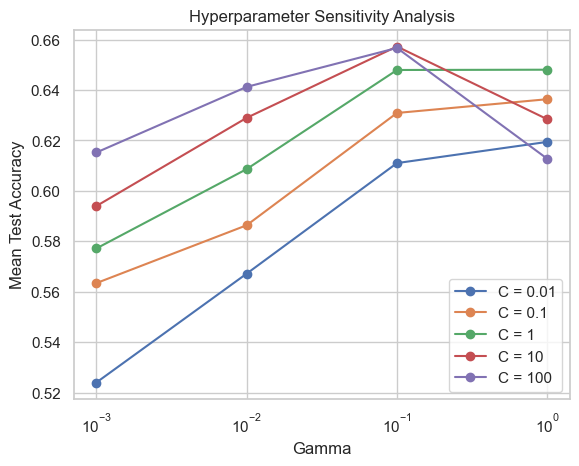

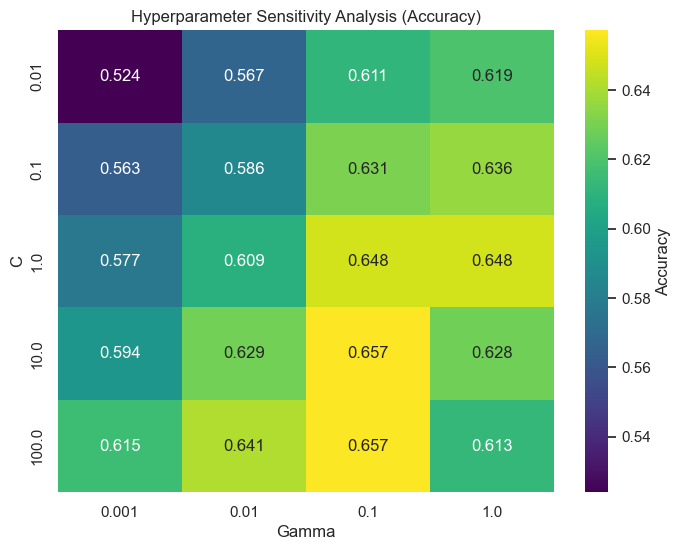

In [32]:
# Plotting line plots for sensitivity analysis
for c in param_grid['C']:
    subset = results[results['param_C'] == c]
    plt.plot(
        param_grid['gamma'],
        subset['mean_test_score'],
        marker='o',
        label=f'C = {c}',
    )

plt.xlabel('Gamma')
plt.ylabel('Mean Test Accuracy')
plt.title('Hyperparameter Sensitivity Analysis')
plt.legend()
plt.xscale('log')
plt.show()

# Creating pivot table for heatmap
pivot_table = results.pivot(
    index='param_C', columns='param_gamma', values='mean_test_score'
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_table, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Accuracy'}
)
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Hyperparameter Sensitivity Analysis (Accuracy)")
plt.show()

#### Key Takeaways
* Effect of C:
    * Increasing C allows for a more complex decision boundary, which can better capture the nuances in the data but may risk overfitting if too high.
* Effect of gamma:
    * Moderate gamma values strike a balance between fitting the training data and generalizing to new data.
    * Extremely high gamma values lead to overfitting, while very low values may underfit the data.

## 5. Analysis and Report 

#### **Summary of Results**
1. **Linear Kernel**
    * Training Time: 0.011618 seconds
    * Accuracy: 0.55
    * Classification Report:
        * Precision: 0.62 (for class 0), 0.55 (for class 1)
        * Recall: 0.14 (for class 0), 0.92 (for class 1)
        * F1-Score: 0.23 (for class 0), 0.69 (for class 1)
    * AUC: 0.56

2. **Polynomial Kernel**
    * Training Time: 0.0206 seconds
    * Accuracy: 0.61
    * Classification Report:
        * Precision: 0.72 (for class 0), 0.58 (for class 1)
        * Recall: 0.28 (for class 0), 0.91 (for class 1)
        * F1-Score: 0.40 (for class 0), 0.71 (for class 1)
    * AUC: 0.592

3. **RBF Kernel**
    * Training Time: 0.0119 seconds
    * Accuracy: 0.65
    * Classification Report:
        * Precision: 0.65 (for class 0), 0.64 (for class 1)
        * Recall: 0.54 (for class 0), 0.74 (for class 1)
        * F1-Score: 0.59 (for class 0), 0.69 (for class 1)
    * AUC: 0.639

4. **Custom Kernel**
    * Training Time: 0.0048 seconds
    * Accuracy: 0.59
    * Classification Report:
        * Precision: 0.57 (for class 0), 0.61 (for class 1)
        * Recall: 0.57 (for class 0), 0.61 (for class 1)
        * F1-Score: 0.57 (for class 0), 0.61 (for class 1)
    * AUC: 0.589

### Performance Comparison

**Accuracy:**
* Best: RBF Kernel (0.65)
* Moderate: Polynomial Kernel (0.61)
* Good but lower: Custom Kernel (0.59)
* Lowest: Linear Kernel (0.55)

**Precision and Recall:**
* RBF Kernel demonstrates a balanced precision and recall for both classes, indicating a reliable model performance.
* Polynomial Kernel has higher precision for class 0 but lower recall, suggesting it is better at avoiding false positives but missing some true positives.
* Linear Kernel shows very low recall for class 0, which means it is struggling to identify that class.
* Custom Kernel maintains balanced precision and recall, but at lower values than RBF.

**F1-Score:**
* The RBF Kernel again performs best overall, particularly in identifying class 1 correctly while still maintaining a decent performance for class 0.
* The Polynomial Kernel shows the highest F1-score for class 1, while the Linear Kernel has the lowest F1-score for class 0.

**AUC Scores:**
* Best: RBF Kernel (0.639)
* Moderate: Polynomial Kernel (0.592)
* Good: Custom Kernel (0.589)
* Lowest: Linear Kernel (0.56)

**Training and Prediction Time:**
* The Custom Kernel is the fastest in terms of training time (0.0048 seconds), followed closely by the RBF Kernel (0.0119 seconds) and Linear Kernel (0.011618 seconds).
* Polynomial Kernel takes longer to train (0.0206 seconds), suggesting more complexity in its calculations.

### Insights and Recommendations

**Most Suitable Kernel:** The `RBF Kernel` stands out as the best option for the HIGGS dataset, as it offers the highest accuracy (0.65), balanced precision and recall, and the best AUC score (0.639). It also maintains efficient training time, making it a robust choice for practical applications.

**Use Cases for Other Kernels:**
* Polynomial Kernel may be appropriate if you require a slightly more complex decision boundary and can afford the longer training time.
* Linear Kernel might be useful for very large datasets where computational efficiency is critical, despite its poorer performance on this specific dataset.
* Custom Kernel could serve as an alternative if specific domain knowledge justifies its formulation, but it currently underperforms compared to the others.

Overall, the choice of kernel should balance performance metrics with computational efficiency, with the RBF Kernel being the most favorable for this dataset.

  0%|          | 0/50 [00:00<?, ?it/s]

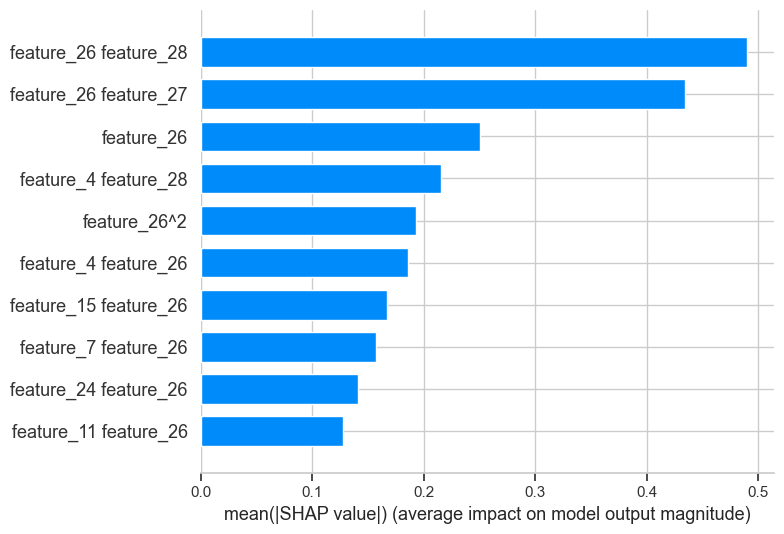

In [33]:
import shap

X_train_df = pd.DataFrame(X_train, columns=selected_features)
y_train_series = pd.Series(y_train)

# Fit the model on a subset for SHAP analysis (due to computational constraints)
best_svm.fit(X_train_df.iloc[:500], y_train_series.iloc[:500])

X_test_df = pd.DataFrame(X_test, columns=selected_features)

# Creating SHAP explainer
explainer = shap.KernelExplainer(best_svm.decision_function, X_train_df.iloc[:100])

# Computing SHAP values
shap_values = explainer.shap_values(X_test_df.iloc[:50])

# Plot summary plot
shap.summary_plot(shap_values, X_test_df.iloc[:50], plot_type="bar")


Steps to Use SHAP for Explainability
* Fit the Model:
    * Fit the model on a subset of the data for SHAP analysis (due to computational constraints).
* Create SHAP Explainer:
    * Create a SHAP explainer object using the fitted model and a subset of the training data.
* Compute SHAP Values:
    * Compute SHAP values for a subset of the test data.
* Plot SHAP Summary:
    * Plot a SHAP summary plot to visualize the importance of features.

> We can observe that `feature_26 feature_27` is the most influential feaature.